# Banned Book Metadata (Goodreads & PEN/American Library Association)

In [1]:
#!pip install missingno

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Create a list of English stopwords
stop_words = stopwords.words('english')

## Bring in Banned Books Metadata

In [4]:
df = pd.read_csv('banned_books.csv')

In [5]:
df.head(3)

,goodreads_image_url,title,author,goodreads_published_date,goodreads_description,goodreads_tags,type_of_ban,state,district,ban_date,origin_of_challenge,goodreads_product_url,amazon_url,secondary_authors,illustrators,translators
0,https://images-na.ssl-images-amazon.com/images...,Ace of Spades,"Àbíké-Íyímídé, Faridah",2021-06-01,An incendiary and utterly compelling thriller ...,"dark, lgbtqia+, black, young adult, gay romanc...",Banned in Libraries and Classrooms,Florida,Indian River County School District,November 2021,Administrator,https://www.goodreads.com/book/show/42603984-a...,https://www.amazon.com/Ace-Spades-Faridah-Abik...,NaN,NaN,NaN
1,https://images-na.ssl-images-amazon.com/images...,Clap When You Land,"Acevedo, Elizabeth",2020-05-05,In a novel in verse that brims with grief and ...,"young adult, poetry, contemporary, fiction, au...",Banned in Classrooms,Pennsylvania,Central York School District,September 2021,Administrator,https://www.goodreads.com/book/show/52516332-c...,https://www.amazon.com/Clap-When-Land-Elizabet...,NaN,NaN,NaN
2,https://images-na.ssl-images-amazon.com/images...,The Poet X,"Acevedo, Elizabeth",2018-03-06,Fans of Jacqueline Woodson Meg Medina and Ja...,"poetry, young adult, contemporary, fiction, au...",Banned in Libraries,Florida,Indian River County School District,November 2021,Administrator,https://www.goodreads.com/book/show/33294200-t...,https://www.amazon.com/Poet-X-Elizabeth-Aceved...,NaN,NaN,NaN


## Check for Data Completeness

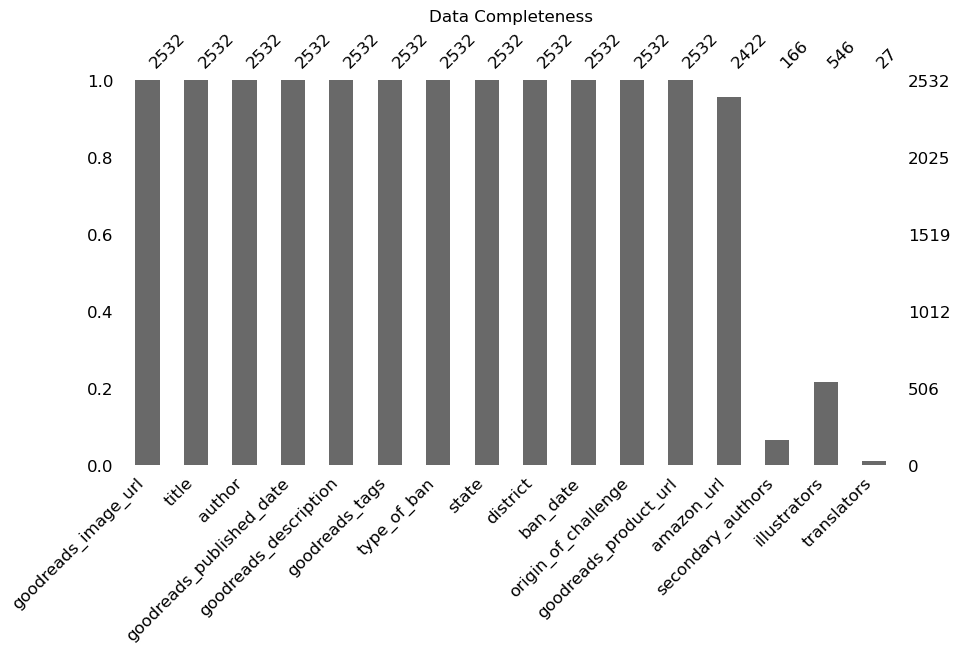

In [6]:
msno.bar(df, figsize=(10,5), fontsize=12);
plt.title("Data Completeness");

## Display Book Cover Images in Dataframe

In [7]:
text_df = pd.DataFrame(columns = ['title'], data = df.title)
text_df['description'] = df['goodreads_description']+df['goodreads_tags']
text_df = text_df.drop_duplicates()


In [8]:
%time v = TfidfVectorizer(stop_words=stop_words, ngram_range=(2, 2), use_idf=True)
%time V = v.fit_transform(text_df['description'])

df_tf = pd.DataFrame(V.toarray(),
                     columns=v.vocabulary_,
                     index=text_df['title'])
#display(df_tf.head())

CPU times: user 37 µs, sys: 32 µs, total: 69 µs
Wall time: 25 µs
CPU times: user 486 ms, sys: 190 ms, total: 676 ms
Wall time: 329 ms


In [9]:
df_tf

,incendiary utterly,utterly compelling,compelling thriller,thriller shocking,shocking twist,twist delves,delves deep,deep heart,heart institutionalized,institutionalized racism,...,ready eat,eat birthday,birthday present,present special,special surprise,surprise waiting,waiting front,door picture,food africa,cooking realistic
title,,,,,,,,,,,,,,,,,,,,,
Ace of Spades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clap When You Land,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Poet X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Poet X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Call Me By Your Name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Garden of My Imaan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Read the World: Rethinking Literacy for Empathy and Action in a Digital Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Street,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
idf_df = pd.DataFrame(
    v.idf_, 
    index=v.vocabulary_,
    columns=['idf_weigths']
    )
    
idf_df.sort_values(by=['idf_weigths']).head(10)

#The greater the IDF, the more relevant it is to an article
#1 mention out of 1 articles = log(1/1) = 0.0
#1 mention out of 2 articles = log(2/1) = 0.69
#1 mention out of 10 articles = log(10/1) = 2.30
#1 mention out of 100 articles = log(100/1) = 4.61

,idf_weigths
ramadan wear,1.712079
price finally,1.931837
frustration graceful,2.558145
feyre endeavors,2.933884
expect ben,2.985397
rehearsals environmentally,2.994247
america days,3.200861
problem anderson,3.206340
professional passionate,3.257056
count every,3.354101


In [11]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

# (optional) Disable FutureWarning of Scikit-learn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# select number of topic clusters
n_topics = 6

# Create an NMF instance
nmf = NMF(n_components=n_topics)

In [12]:
# Fit the model to the tf_idf
%time nmf_features = nmf.fit_transform(V)

# normalize the features
%time norm_features = normalize(nmf_features)

CPU times: user 894 ms, sys: 1.8 s, total: 2.69 s
Wall time: 538 ms
CPU times: user 889 µs, sys: 1.57 ms, total: 2.46 ms
Wall time: 1.24 ms


In [13]:
# Compare processed VS unprocessed dataframes
print('Original df: ', df_tf.shape)
print('NMF Processed df: ', nmf.components_.shape)

Original df:  (1652, 109103)
NMF Processed df:  (6, 109103)


In [14]:
# Create clustered dataframe the NMF clustered df
components = pd.DataFrame(
    nmf.components_, 
    columns=[df_tf.columns]
    ) 

clusters = {}

# Show top 8 queries for each cluster
for i in range(len(components)):
    clusters[i] = []
    loop = dict(components.loc[i,:].nlargest(8)).items()
    for k,v in loop:
        clusters[i].append({'q':k[0],'sim_score': v})

In [15]:
# Create dataframe using the clustered dictionary
grouping = pd.DataFrame(clusters).T
grouping['topic'] = grouping[0].apply(lambda x: x['q'])
grouping.drop(0, axis=1, inplace=True)
grouping.set_index('topic', inplace=True)

def show_queries(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x['q'])
    return df

# Only display the query in the dataframe
clustered_queries = show_queries(grouping)
clustered_queries.head()

,1,2,3,4,5,6,7
topic,,,,,,,
ramadan wear,rehearsals environmentally,price finally,professional passionate,grade fiction,problem anderson,question colorful,ways sometimes
life city,weathers move,talk home,miss tillie,whether growing,lit erotic,judge asks,traces someone
frustration graceful,expect ben,ceiling defied,price finally,destroy life,hold frustration,viewpoints many,historical historical
stardust dead,author recent,carla espana,locks open,expectancy effects,australia high,amy diary,adam rapp
characters reveal,distracts mother,daruma doll,feyre endeavors,students never,lgbtqia gay,gay fiction,discovery alek


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
pages = text_df.title

# compute cosine similarities of each cluster
data = {}
# create dataframe
norm_df = pd.DataFrame(norm_features, index=pages)

In [17]:
norm_df = norm_df[~norm_df.index.duplicated(keep='first')]
norm_df

,0,1,2,3,4,5
title,,,,,,
Ace of Spades,0.996897,0.000000,0.000000,0.000000,0.000000,0.078716
Clap When You Land,0.924947,0.000000,0.156422,0.343601,0.044090,0.000000
The Poet X,0.998852,0.000000,0.000000,0.047905,0.000000,0.000000
Call Me By Your Name,0.980282,0.013202,0.197165,0.000000,0.000000,0.000000
"How I Paid for College: A Novel of Sex, Theft, Friendship & Musical Theater",0.999915,0.000000,0.013026,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
The Garden of My Imaan,0.766670,0.000000,0.642027,0.000000,0.004414,0.000000
Read the World: Rethinking Literacy for Empathy and Action in a Digital Age,0.261738,0.391922,0.880470,0.051604,0.000000,0.000000
American Street,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
import numpy as np
from numpy.linalg import norm

def cosine_metric(A,B):
    return np.dot(A,B)/(norm(A)*norm(B))

In [19]:
def create_recdict(norm_df):
    recomender = {}
    for x in range(len(norm_df)):
        interest = norm_df.index[x]
        recomender_scores =[(norm_df.index[y],cosine_metric(norm_df.iloc[x],norm_df.iloc[y])) for y in range(len(norm_df))]
        temp = {interest: recomender_scores}
        recomender.update(temp)
    return recomender

In [20]:
recomender = create_recdict(norm_df)

/var/folders/1_/21s5jfd972lfflx7w5z56tmh0000gn/T/ipykernel_7159/615553476.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(A,B)/(norm(A)*norm(B))


In [21]:
def get_top_N_recomended(book_name,recomender=recomender, num_recomendations=3):
    rec = sorted(recomender.get(book_name), key = lambda x: x[1])[::-1]
    for r in rec:
        if r[0] == book_name:
            rec.remove(r)
    return rec[:num_recomendations]

In [22]:
get_top_N_recomended(book_name ='The Poet X')

[('The Edge of the Water ', 0.9999693928413702),
 ("Taking Responsibility: A Teen's Guide to Contraception and Pregnancy",
  0.9998128185988717),
 ('Black Girl Unlimited: The Remarkable Story of a Teenage Wizard',
  0.9997951797046282)]

In [23]:
df[df['title'] == "The Lady's Guide to Petticoats and Piracy "]["goodreads_description"].to_string(index=False)

'A year after an accidentally whirlwind grand to...'

In [24]:
df["goodreads_description"][0]

'An incendiary and utterly compelling thriller with a shocking twist that delves deep into the heart of institutionalized racism  from an exceptional new YA voice   Welcome to Niveus Private Academy  where money paves the hallways  and the students are never less than perfect  Until now  Because anonymous texter  Aces  is bringing two students  dark secrets to light   Talented musician Devon buries himself in rehearsals  but he can t escape the spotlight when his private photos go public  Head girl Chiamaka isn t afraid to get what she wants  but soon everyone will know the price she has paid for power   Someone is out to get them both  Someone who holds all the aces  And they re planning much more than a high school game   '